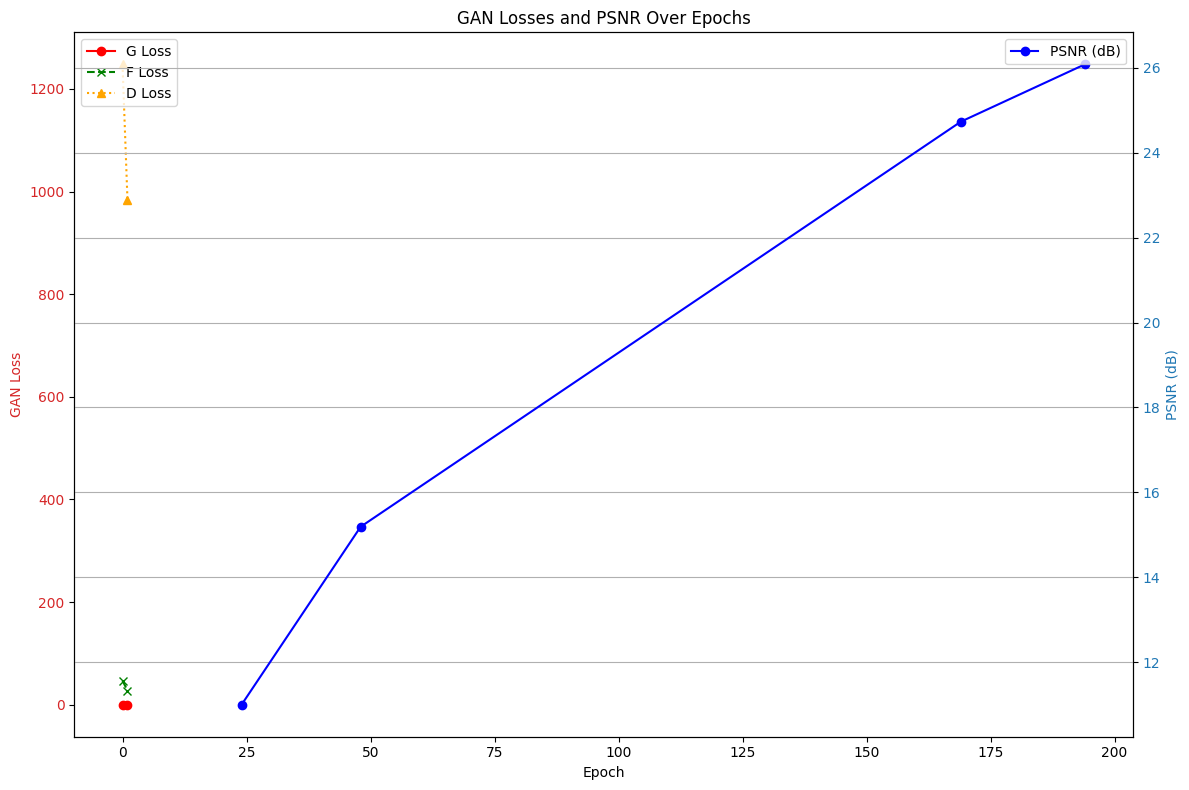

In [1]:
import re
import matplotlib.pyplot as plt

# Log entries to be parsed
logs = """
24-05-01 12:33:55.898 : <epoch:  0, iter:     200, lr:1.000e-03> G_loss: 8.677e-03 F_loss: 4.688e+01 D_loss: 1.248e+03 D_real: -5.158e+04 D_fake: -2.495e+05 
24-05-01 12:40:44.783 : <epoch:  1, iter:     400, lr:1.000e-03> G_loss: 3.437e-03 F_loss: 2.757e+01 D_loss: 9.833e+02 D_real: -5.255e+04 D_fake: -1.967e+05 
24-05-01 15:17:38.281 : <epoch: 24, iter:   5,000, lr:1.000e-03, Average PSNR : 11.00dB
24-05-01 18:08:12.884 : <epoch: 48, iter:  10,000, Average PSNR : 15.19dB
24-05-02 08:20:24.238 : <epoch:169, iter:  35,000, Average PSNR : 24.73dB
24-05-02 11:10:36.328 : <epoch:194, iter:  40,000, Average PSNR : 26.08dB
"""

# Regular expression to extract data from logs
psnr_pattern = r"<epoch:\s*(\d+),\s*iter:\s*(\d+)[^<]*Average PSNR\s*:\s*([\d\.]+)dB"

# Extract PSNR values
matches = re.findall(psnr_pattern, logs)
epochs_psnr = [int(m[0]) for m in matches]
psnr_values = [float(m[2]) for m in matches]

gan_pattern = r"<epoch:\s*(\d+),\s*iter:\s*(\d+)[^>]*> G_loss:\s*([\d\.e\+\-]+)\s*F_loss:\s*([\d\.e\+\-]+)\s*D_loss:\s*([\d\.e\+\-]+)"

# Extract GAN loss values
gan_matches = re.findall(gan_pattern, logs)
epochs_gan = [int(m[0]) for m in gan_matches]
g_losses = [float(m[2]) for m in gan_matches]
f_losses = [float(m[3]) for m in gan_matches]
d_losses = [float(m[4]) for m in gan_matches]

# Creating a combined plot for GAN losses and PSNR

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plotting GAN losses
ax1.set_xlabel('Epoch')
ax1.set_ylabel('GAN Loss', color='tab:red')
ax1.plot(epochs_gan, g_losses, marker='o', color='r', linestyle='-', label='G Loss')
ax1.plot(epochs_gan, f_losses, marker='x', color='g', linestyle='--', label='F Loss')
ax1.plot(epochs_gan, d_losses, marker='^', color='orange', linestyle=':', label='D Loss')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.legend(loc='upper left')

# Plotting PSNR values on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('PSNR (dB)', color='tab:blue')
ax2.plot(epochs_psnr, psnr_values, marker='o', color='b', label='PSNR (dB)')
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.legend(loc='upper right')

# Adding grid and title
plt.grid(True)
plt.title('GAN Losses and PSNR Over Epochs')
fig.tight_layout()
plt.show()


In [5]:
from cmath import e
import matplotlib.pyplot as plt


epochs = list(range(205))
G_losses = [8.677e-03, 3.437e-03, 1.397e-03, 1.770e-03, 1.073e-03, 1.226e-03, 8.501e-04, 6.261e-04, 5.950e-04, 8.485e-04,
            3.111e-04, 9.087e-04, 5.342e-04, 4.222e-04, 1.295e-03, 3.696e-03, 6.512e-04, 5.410e-04, 7.432e-04, 4.429e-04,
            4.920e-04, 2.699e-04, 4.965e-04, 6.154e-04, 7.178e-04, 6.994e-04, 3.791e-04, 3.342e-03, 6.551e-04, 6.295e-04,
            5.138e-04, 6.655e-04, 4.634e-04, 4.424e-04, 5.505e-04, 3.476e-04, 3.907e-04, 3.819e-04, 3.268e-04, 3.436e-04,
            6.106e-04, 2.514e-04, 2.688e-04, 2.310e-04, 1.439e-04, 2.283e-04, 2.442e-04, 2.895e-04, 2.558e-04, 2.962e-04,
            2.830e-04, 2.259e-04, 2.665e-04, 2.282e-04, 2.322e-04, 3.205e-04, 2.425e-04, 2.326e-04, 3.254e-04, 3.629e-04,
            2.264e-04, 3.053e-04, 3.395e-04, 2.767e-04, 3.298e-04, 2.641e-04, 4.987e-04, 2.652e-04, 3.752e-04, 4.138e-04,
            5.050e-04, 2.848e-04, 3.777e-04, 4.019e-04, 4.595e-04, 3.633e-04, 4.924e-04, 4.384e-04, 4.253e-04, 4.336e-04,
            5.150e-04, 5.132e-04, 6.296e-04, 4.207e-04, 6.640e-04, 5.324e-04, 1.034e-03, 2.920e-03, 9.987e-02, 2.140e-02,
            1.890e-02, 3.495e-04, 3.236e-03, 3.100e-03, 2.584e-03, 1.735e-03, 2.607e-03, 1.474e-03, 1.772e-03, 1.261e-03,
            6.495e-04, 4.581e-04, 3.135e-04, 1.680e-04, 1.094e-04, 7.127e-05, 4.507e-05, 7.016e-05, 6.208e-05, 6.030e-05,
            6.302e-05, 4.489e-05, 4.025e-05, 3.671e-05, 4.386e-05, 1.419e-04, 4.726e-05, 4.816e-05, 9.083e-04, 8.754e-05,
            1.672e-04, 1.250e-04, 5.975e-05, 4.474e-05, 3.715e-05, 6.661e-05, 4.860e-05, 5.344e-05, 5.086e-05, 4.359e-05,
            2.815e-05, 4.875e-05, 3.133e-05, 4.287e-05, 3.111e-05, 4.992e-05, 3.531e-05, 2.826e-05, 4.004e-05, 3.161e-05,
            5.759e-05, 4.053e-05, 3.623e-05, 4.601e-05, 5.101e-05, 6.706e-05, 9.810e-05, 5.380e-05, 3.376e-05, 5.812e-05,
            5.222e-05, 5.747e-05, 5.362e-04, 2.851e-05, 4.165e-05, 8.852e-05, 1.002e-04, 8.062e-05, 2.582e-05, 4.739e-05,
            5.800e-05, 8.860e-05, 4.715e-05, 7.018e-05, 2.686e-05, 3.445e-05, 9.614e-05, 1.083e-04, 8.445e-05, 1.246e-04,
            4.934e-05, 5.361e-05, 2.959e-04, 6.030e-05, 5.063e-05, 6.921e-05, 3.306e-05, 1.144e-04, 2.030e-05, 3.417e-04,
            3.520e-05, 2.909e-05]

F_losses = [4.688e+01, 2.757e+01, 1.204e+01, 7.502e+00, 7.239e+00, 8.704e+00, 5.985e+00, 6.411e+00, 6.803e+00, 7.313e+00,
            6.836e+00, 7.117e+00, 5.873e+00, 4.463e+00, 8.593e+00, 7.587e+00, 5.079e+00, 6.002e+00, 6.417e+00, 5.817e+00,
            6.912e+00, 6.959e+00, 5.851e+00, 6.498e+00, 5.880e+00, 5.159e+00, 5.776e+00, 8.909e+00, 7.936e+00, 7.096e+00,
            5.614e+00, 6.198e+00, 5.141e+00, 5.263e+00, 6.601e+00, 8.427e+00, 6.810e+00, 6.321e+00, 7.354e+00, 6.682e+00,
            8.083e+00, 6.467e+00, 5.990e+00, 7.307e+00, 4.951e+00, 6.086e+00, 5.804e+00, 7.339e+00, 6.418e+00, 5.738e+00,
            5.763e+00, 6.933e+00, 4.763e+00, 4.526e+00, 7.731e+00, 4.991e+00, 4.906e+00, 3.581e+00, 4.807e+00, 3.773e+00, 4.044e+00,
             6.227e+00, 3.659e+00, 5.449e+00, 5.264e+00, 5.652e+00, 6.346e+00, 6.464e+00, 4.539e+00, 3.918e+00, 5.217e+00,
             5.407e+00, 7.995e+00, 5.998e+00, 9.383e+01, 7.914e+00, 8.014e+00, 7.608e+00, 7.251e+00, 6.045e+00, 5.488e+00,
             4.656e+00, 6.406e+00, 4.777e+00, 4.351e+00, 5.463e+00, 2.460e+00, 3.792e+00, 3.617e+00, 3.348e+00, 3.503e+00,
             3.806e+00, 3.861e+00, 3.764e+00, 4.202e+00, 3.718e+00, 4.153e+00, 3.816e+00, 2.910e+00, 2.975e+00, 3.362e+00,
             3.573e+00, 3.242e+00, 3.075e+00, 4.430e+00, 5.447e+00, 2.648e+00, 3.392e+00, 2.576e+00, 3.044e+00, 2.825e+00,
             2.617e+00, 4.385e+00, 2.066e+00, 3.815e+00, 3.383e+00, 2.762e+00, 3.952e+00, 2.997e+00, 3.908e+00, 2.281e+00,
             3.266e+00, 2.779e+00, 2.342e+00, 3.727e+00, 2.481e+00, 3.731e+00, 3.476e+00, 3.453e+00, 3.487e+00, 2.793e+00,
             2.585e+00, 2.990e+00, 2.461e+00, 3.412e+00, 3.208e+00, 3.688e+00, 2.339e+00, 2.366e+00, 2.051e+00, 3.394e+00,
             2.916e+00, 2.643e+00, 2.857e+00, 3.663e+00, 2.938e+00, 3.320e+00, 2.397e+00, 2.563e+00, 2.859e+00, 3.602e+00,
             3.073e+00, 2.988e+00, 2.511e+00, 2.315e+00, 2.678e+00, 2.992e+00, 2.572e+00, 2.354e+00, 2.464e+00, 2.781e+00,
             2.015e+00, 3.387e+00, 2.594e+00, 2.286e+00]

D_losses = [1.248e+03, 9.833e+02, 7.980e+02, 8.198e+02, 7.470e+02, 7.264e+02, 8.900e+02, 4.832e+02, 2.812e+02, 2.479e+02,
            1.661e+02, 3.510e+02, 6.841e+02, 3.734e+02, 5.705e+02, 1.427e+01, 1.177e+00, 7.353e-01, 6.791e-01, 6.077e-01,
            5.672e-01, 7.991e-01, 7.800e-01, 9.279e-01, 1.454e+00, 2.197e+00, 1.954e+01, 1.539e+03, 9.001e+02, 7.123e+02,
            5.549e+02, 5.358e+02, 3.732e+02, 4.592e+02, 4.497e+02, 4.227e+02, 4.464e+02, 4.025e+02, 4.483e+02, 4.718e+02,
            3.954e+02, 2.445e-01, -7.838e-03, -2.639e-02, -2.209e-02, -2.252e-02, -2.578e-02, -3.173e-02, -2.869e-02, -3.188e-02,
            -3.197e-02, -2.338e-02, -3.180e-02, -3.163e-02, -3.222e-02, -3.146e-02, -3.415e-02, -3.351e-02, -3.368e-02, -3.380e-02,
            -3.381e-02, -3.198e-02, -3.405e-02, -3.303e-02, -3.390e-02, -3.369e-02, -3.206e-02, -3.492e-02, -3.413e-02, -3.161e-02,
            -3.047e-02, -3.327e-02, -2.927e-02, -3.313e-02, -3.321e-02, -2.714e-02, -3.080e-02, -2.780e-02, -2.926e-02, -2.764e-02,
            -2.633e-02, -2.332e-02, -8.527e-03, -2.203e-02, -2.385e-02, -1.392e-02, -1.077e-02, 8.793e+02, 7.406e-02, 9.737e+00,
            -4.182e-01, 3.624e+02, -8.885e-01, -7.904e-01, -7.450e-01, -7.027e-01, -6.362e-01, -6.196e-01, -6.107e-01, -6.252e-01,
            -6.397e-01, -6.670e-01, -7.050e-01, -7.397e-01, -8.510e-01, -7.816e-01, -6.789e-01, -6.363e-01, -4.000e-01, -3.731e-01,
            -3.351e-01, -3.331e-01, -3.603e-01, -4.184e-01, -3.462e-01, -3.392e-01, -3.458e-01, -2.689e-01, -9.197e-01, -7.600e-01,
            -3.856e-01, -2.818e-01, -2.767e-01, -2.906e-01, -2.558e-01, -2.309e-01, -2.233e-01, -2.060e-01, -2.046e-01, -1.809e-01,
            -2.066e-01, -3.138e-01, -2.151e-01, -2.425e-01, -2.364e-01, -2.945e-01, -2.813e-01, 4.053e-05, 3.623e-05, 4.601e-05, 5.101e-05,
             6.706e-05, 9.810e-05, 5.380e-05, 3.376e-05, 5.812e-05,
            5.222e-05, 5.747e-05, 5.362e-04, 2.851e-05, 4.165e-05, 8.852e-05, 1.002e-04, 8.062e-05, 2.582e-05, 4.739e-05,
            5.800e-05, 8.860e-05, 4.715e-05, 7.018e-05, 2.686e-05, 3.445e-05, 9.614e+02]


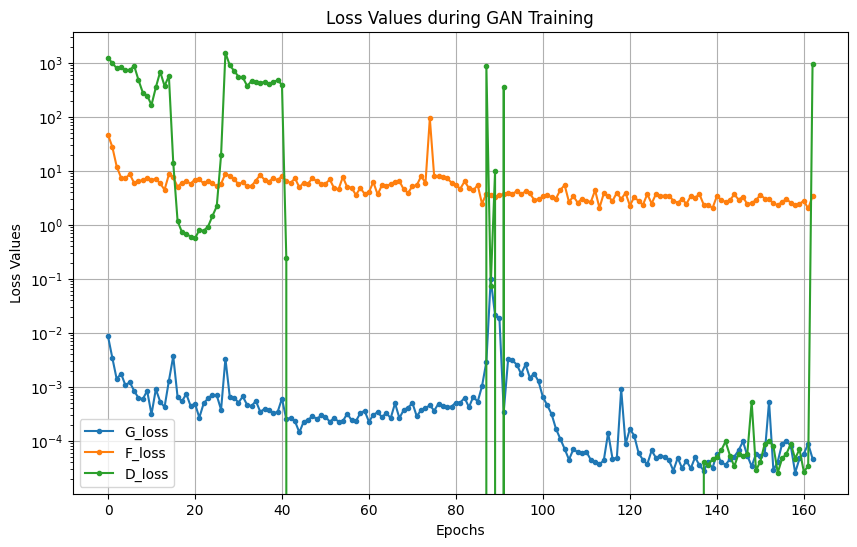

In [6]:
max_epochs = min(len(G_losses), len(F_losses), len(D_losses))
G_losses = G_losses[:max_epochs]
F_losses = F_losses[:max_epochs]
D_losses = D_losses[:max_epochs]
epochs = list(range(max_epochs))

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(epochs, G_losses, label='G_loss', marker='o', markersize=3)
plt.plot(epochs, F_losses, label='F_loss', marker='o', markersize=3)
plt.plot(epochs, D_losses, label='D_loss', marker='o', markersize=3)
plt.xlabel('Epochs')
plt.ylabel('Loss Values')
plt.yscale('log')
plt.legend()
plt.title('Loss Values during GAN Training')
plt.grid(True)
plt.show()